# Bootstrapping

## How estimates vary
We now know how to generate the median, or in fact any percentile, from a random sample.  But, as we said, that is just *one* incidence statistic from a random sample.  We would like to know how this statistic would "behave" (what types of values in would take) in *lots* of samples. The problem is that we only have the one random sample we took. 

In a more traditional statistics class, we would calculate the possible values *analytically*.  That is, we would use mathematics tools to work out the 'theory' of how this statistic should behave under various different scenarios.  However, in this course, we will approach the problem by *simulation*. In particular, we will use a special technique called "the bootstrap", which uses a computer plus our random sample, to tell us what we need to know about variability and uncertainty.  

In a sense, bootstrapping is simpler than more traditional methods of calculating the things we need: we follow a computational recipe, and it generally works, even for quite complicated scenarios.  In other ways though, it is more involved, insofar as it requires fast and accurate computation---something that has not always been available historically.  

We will get into details momentarily, but first let's load up some Python packages which will be useful for our demonstrations below.

## The Bootstrap

Previously, we met the idea of a **sampling distribution**. It is

> the probability distribution of the statistic from many random samples. Literally for us, it will be the histogram of all the values that the statistic takes from many random draws from the population.

As the description suggests, if we have the sampling distribution of, say, the 60th percentile, we know how likely we are to observe various estimated values of that 60th percentile in practice.  To get the sampling distribution, we merely had to take lots of samples, calculating the statistic of interest each time---and then plotting it.

Our problem is that we cannot do that here: we have one sample of voters or of goods or of incomes or whatever.  What we *can* do is use the **bootstrap**.  This is a

> procedure for simulating the sampling distribution of a given statistic.  

It does this by making a key assumption that works (surprisingly!) well.  It says

> treat the sample *as if* it is the *population*.  So, draw lots of re-samples from the original sample (with replacement), and record the statistic of interest each time.  Then study the *distribution* of *those* statistics.

To restate things: ideally, we would *like* to draw many samples from the population.  But we cannot, for the usual reasons of time or money.  What bootstrapping says is: instead of drawing many samples from the population, draw one sample...and then resample from *that* sample many times, and build up the sampling distribution from that.

Though not important for understanding how the bootstrap is used, note that the name of the technique is derived from the idea of "pulling yourself up by your bootstraps"---which means, essentially, helping oneself achieve something without external support.  Here, we are going to "achieve" the sampling distribution from one sample alone, without having vital "external" knowledge about the population it is drawn from.

In [1]:
import matplotlib.pyplot as plots
import numpy as np
import pandas as pd

## Working through an example: bootstrapping the median

Around 290,000 people work for New York City in various capacities.  Let's call that the "population" (it is stored as `nyc_population_salaries.csv`) The median salary for that population is $\$58,850$, as we can see below:

In [2]:
nyc_salary_full_all = pd.read_csv('data/nyc_population_salaries.csv')
popn_median = np.percentile(nyc_salary_full_all['Base.Salary'], 50)
print("'true' pop med we are trying to capture:",popn_median,"")

'true' pop med we are trying to capture: 58850.0 


In a typical problem, we won't have the population.  But we will have a sample.  Let's load up our sample ($n=500$), and see what its median is.

In [3]:
nyc_salary_samp = pd.read_csv('data/nyc_salaries.csv')
print("median of sample:",np.percentile(nyc_salary_samp[["Base.Salary"]], 
                                        50 ),"")

median of sample: 57846.0 


So the sample median was $\$57,846$.  That's close to our population median, but not identical to it. Of course, it's not surprising it does not have an identical median---it is random sample, after all. 

### Bootstrap the median

We want to compare our sample with samples we *could have* taken.  We will use the bootstrap to do this, and that means we treat the sample *as if* it is the population.  So, instead of sampling many times ($n=500$ each time) from the population, we will sample many times ($n=500$ each time) from *our sample*.  In particular, we will sample **with replacement**.

Recall, that if we sample *with replacement* it means that if that observation is (randomly) picked, it is recorded, then *returned* to whatever we are sampling from so that it can be potentially be picked again.  Consequently, the *same* observation can appear multiple times in the random sample we draw.  

Just as a toy example, suppose we begin with five colored balls as our sample: one green, one red, one blue, one yellow, one white.

:::{figure-md} start_cols
<img src="figures/start_cols.jpg" alt="start_cols" class="bg-white mb-1" width="250px">

Initial sample
:::

We sample one ball from this group.  It is yellow:  

:::{figure-md} yellow1
<img src="figures/yellow1.jpg" alt="yellow1" class="bg-white mb-1" width="40px">

Sample one ball

:::

We are sampling with replacement, so we return that yellow ball to the group, and sample again.  We picked yellow again.  We record *that* yellow ball and return it; our resample *so far* consists of two yellow balls. 

:::{figure-md} yellow2
<img src="figures/yellow2.jpg" alt="yellow2" class="bg-white mb-1" width="90px">

Sample a second ball 
:::

We sample again, and this time pick a red ball.  Our resample *so far* consists of two yellow balls, and one red.

:::{figure-md} red1
<img src="figures/red1.jpg" alt="red1" class="bg-white mb-1" width="150px">

Sample a third ball 
:::

We return that red ball, and pick again.  Again, we get a red ball.

:::{figure-md} red2
<img src="figures/red2.jpg" alt="red2" class="bg-white mb-1" width="200px">

Sample a fourth ball
:::

We return that red ball, and sample again, which yields a green ball.  So here is our the 'final' version of our *first* resample: 

:::{figure-md} sample1
<img src="figures/sample1.jpg" alt="sample1" class="bg-white mb-1" width="250px">

Final version of our *first* resample
:::

Our *second* resample ended up with us picking blue, then white, then red, then green, then white again.  Here it is:

:::{figure-md} sample2
<img src="figures/sample2.jpg" alt="sample2" class="bg-white mb-1" width="250px">

Final version of our *second* resample
:::

Note that the size of the resample is always the size of the original sample ($n=5$), but its composition typically differs because we are sampling with replacement.

For our running NYC example,  we are treating the salary sample as if it is the salary population. This means that the *same* person (and their salary information) can appear multiple times in the random sample we draw from the "population" (actually, our large random sample, `nyc_salary_samp`).  Each time we draw a sample with replacement in this way, we call it a *resample* because we are sampling again and again from a sample.




### Why does bootstrapping work?
The idea of bootstrapping is that we can use our (one random) sample to get a sense of how close we anticipate our statistic will be to the (fixed, true but unknown) population parameter.  Why does the bootstrap resampling method work for this? The details are quite technical, but some rough intuition may be helpful.  

First, in earlier chapters, we talked about the *Law of Large Numbers*. This was the idea that as the number of observations (actually "trials") grows larger, things we might calculate from those observations---like the average---get closer and closer to the "true" average of the variable (the "expected value").  More broadly, the LLN is connected to the idea that our large random sample will "look like" our population in terms of its distribution: that is, how the different values 'stack up' on the histogram.  

Second, we know that if we *resample* from our large random sample, that resample will look like our (large random) sample, on average.  It will differ a little every time, but overall it will look roughly similar.  


Third and finally: if 
- large random samples from the population resemble the population, and 
- large random resamples resemble the sample, 
then if we put all the resamples together, we will be able to construct something that looks like the *population* itself.  So it will be *as if* we have access to that population when we calculate things like medians, means, percentiles and so on. 

To reiterate, this is a very rough intuition: we will not, in fact, have access to the population at any time.  But the bootstrap resamples will allow us to approximate the information we need. 

### The bootstrapped median salary
Let's start with one resample of our NYC sample salary data.  We will calculate its median. Notice the use of `replace=True` in the function call to tell `.sample` we need to sample with replacement.

In [4]:
a_resample = nyc_salary_samp.sample(frac=1, replace=True)
samp_median = np.percentile(a_resample[["Base.Salary"]], 50 )
print(samp_median)

60000.0


If you run that single resampling code many times, and record the `samp_median`(the resample median) every time, you could build up the sampling distribution.  But that's not very efficient, so we will build a function to do it for us. 

In [5]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample[[label]]
    medians = ([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1, replace=True)
        resampled_median = np.percentile(bootstrap_sample.iloc[:, 0], 50)
        medians = np.append(medians, resampled_median)
        
    return medians

This function grabs the relevant column from the original data (via its `label`), then it draws a resample from that column, and records its median.  It does this many times (`replications` is the number of resamples) and stores those medians in an array (called `medians`).

Let's put the function to work: we will draw 200 resamples, and then look at the histogram of the bootstrap medians.  For obvious reasons that histogram is called the **bootstrap empirical distribution of the sample medians**.  Notice that on the histogram we have added the "true" (but usually unknown) population median, just to get a sense of how our bootstrap distribution does at capturing it.

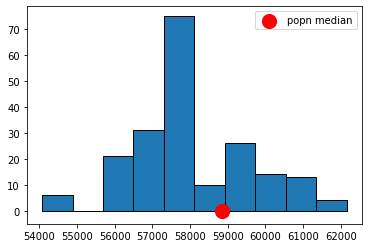

In [6]:
resampled_medians = bootstrap_median(nyc_salary_samp, "Base.Salary", 200)


plots.hist(resampled_medians, ec="black", bins=10)
plots.scatter(popn_median, 0, color='red', 
              s=200, zorder=2, label="popn median");
plots.legend()
plots.ylim(-5, None)
plots.show()

## Confidence Intervals
Did we capture the truth?  That is, did our bootstrap distribution of the sample statistics (in blue) include our "true" population parameter (the single spot in red)?  Just looking at the plot, the answer appears to be "yes". Now, the population parameter wasn't quite at the median of our bootstrap distribution, but it wasn't far off.

We can be a little more systematic about "far off." First, let's think about the "middle" of our sampling distribution.  In particular whether the middle 95% of our estimates include the true median or not.  We can vary the 95% part momentarily, but for now it seems like a reasonable choice.  Obtaining that middle 95% is straightforward, given what we learned above.  Specifically, the middle 95% is just everything between the 2.5th percentile and 97.5th percentile of the distribution: because $97.5-2.5=95$, and we will have the same proportion (2.5%) in each tail.

For reasons that will become clear shortly, we will refer to the 95% as our confidence level.  Let's set that as a variable, and then calculate the upper and lower parts of the distribution we will need. You can work through the math, but ultimately `lower` will 2.5; `upper` will be 97.5.

In [7]:
conf = 95
lower = (100-conf)/2
upper = 100- ((100-conf)/2)

Second, let's draw on the 95% "interval" of the data that these numbers imply.  First, we need the percentiles of our resampled medians that these upper and lower parts of the interval imply. We will call these `left` and `right` they are the left and right ends of the interval we want.

In [8]:
left = np.percentile(resampled_medians, lower)
right = np.percentile(resampled_medians, upper)

Now let's plot everything. That is, let's plot the sampling distribution of the median again, put the population median on, and the 95% interval (in yellow).  Then we can see if that interval included the true median, or not.

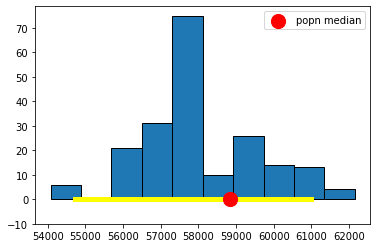

In [9]:
plots.hist(resampled_medians, ec="black", bins=10)
plots.scatter(popn_median, 0, color='red', s=200, zorder=2, label="popn median");
plots.plot(([left, right]), ([0, 0]), color='yellow', lw=5, zorder=1)
plots.legend()
plots.ylim(-10,None)
plots.show()

Well, it worked.  At least this time: the middle 95% interval of the sampling distribution in this case successfully captured the parameter we wanted (the population median).  How *often* will this work? That is, suppose we pulled a different sample at the start, and did a whole other set of bootstraps---which are random after all in terms of the observations they re-draw---would we expect to capture the true median with that *set* from *that* sample?  What if we did that again, and again?  
We will provide some code to check this elsewhere, but for now, consider running the following simulation: 
1. we draw 500 observations from the population, and calculate the median (sample) salary
2. then, we bootstrap that estimate of the median, using 200 resamples.  This produces one 95% interval.
3. we repeat steps 1. and 2. a total of 100 times, to produce one hundred 95% intervals.

When we plot the one hundred intervals, sorting them from the lowest sample median to the highest, they look like this:

:::{figure-md} intervals
<img src="figures/intervals.png" alt="intervals" class="bg-white mb-1" width="400px">

Bootstrapped sample medians
:::

The red vertical bar is the population median: it never changes, and is *always* $\$58,580$.  Our *estimate* of it *does* change, because it is based on a different sample every time, and a different set of bootstrap resamples.  So that means the intervals (in yellow) are in slightly different places.

To return to our query, how often do the intervals capture the truth?  Well, of these 100 intervals, 95 cross with the red vertical line...so that is 95\% of the time. Another way to put that is this method, of sampling and bootstrapping, succeeds in capturing the true parameter we care about 95\% of the time; it fails around 5\% of the time. You can see the intervals that failed at the top and bottom of the plot.

A natural question here is whether we could do better.  That is, could we draw intervals that capture the truth 99\% of the time?  The answer is yes, but the *trade-off* is that we would have to use *larger* intervals.  Intuitively, that may not be desirable if we want to tell people that we think the population parameter is between two numbers: we would prefer those numbers to be close together (a narrow interval) rather than farther apart (a wider interval).  In the limit, we could always say something like "the population median is (for sure) somewhere between $-\infty$ and $+\infty$", but it's hard to think of cases where that is informative.

## Confidence Levels

The bootstrap procedure gave us an *interval* of estimates from our sample.  Not just one (point) estimate of the median, but a whole set.  That interval is implicitly taking into account variability that comes from random sampling: it is doing this via the idea that we can treat the sample *as if* it is the population.  So, it is *as if* we are drawing many samples from the population, which is what we wanted to do initially.  For the 95\% interval, we say we are **"95\% confident"** that it will capture the truth.  And the "truth" is just the actual population parameter value we were interested in.

The interval that captures the truth 95\% of the time is called the **95\% confidence interval**.  This formulation is very general: the interval that captures the truth 99\% of the time is called the **99\% confidence interval**. And the interval that captures the truth 69.45\% of the time is called the **69.45\% confidence interval** etc etc.

Let's take a look at the 95\% confidence interval relative to the 99\% one.  You can just run the code above, changing `conf` to `99`.  It will come out something like this:

:::{figure-md} ci99
<img src="figures/ci99.png" alt="ci99" class="bg-white mb-1" width="300px">

99% confidence interval
:::

and, just as a reminder, here's the 95\% one:

:::{figure-md} ci95
<img src="figures/ci95.png" alt="ci95" class="bg-white mb-1" width="300px">

95% confidence interval
:::

It is immediately obvious that the 99\% confidence interval is wider.  What about the 69.45\% confidence interval? Here it is:

:::{figure-md} ci6945
<img src="figures/ci6945.png" alt="ci6945" class="bg-white mb-1" width="300px">

69.45% confidence interval
:::

And here is the 10.4\% one:

:::{figure-md} ci103
<img src="figures/ci103.png" alt="ci103" class="bg-white mb-1" width="300px">

10.4% confidence interval
:::

These look much narrower, which makes sense because we are less confident we will capture the truth.  In fact, in the case of the 10.3\% one, it looks like we missed the true value altogether.  

### (Mis)understanding Confidence Intervals

Confidence intervals are often misunderstood, so we will try to correct some common misconceptions here.  First and foremost, in our examples above, we put the "true" population parameter on the histograms to see if the confidence intervals.  But in a *real example, we will never know the population parameter value*.  We will try to estimate it, and confidence intervals are a tool for that, but we will never know if we are correct or not (for sure).

Here are four more important facts expressed as true/false statements: 

> (1) A given 95\% confidence interval contains 95\% of a variable's values

This is **false**.  The interval we constructed for the salary variable does not contain 95\% of the salary values.  It is an interval specifically with respect to the *median* of that variable in the population.

> (2) A given 95\% confidence interval captures the true value of the parameter with probability 0.95.

This is **false**, but is an extremely common misconception.  Take a look at the figure above where we showed the 95\% confidence interval in yellow and the population parameter value in red.  That interval either captured the true value of the parameter, or it did not: it didn't capture it with some probability.  That is, the red dot was in the yellow, or it wasn't (it was, in this case).  Now look at the 10.3\% confidence interval.  It did *not* capture the true value.  It is false to say that it captured it with probability 0.103. In fact, with probability $=1$ the true value was not in the interval (probability $=0$ it was in it).

What we *can* say is that if we *repeat the process of forming confidence intervals many many times, 95\% of those times we will capture the true parameter value*. But this is a different statement to saying a *particular* interval e.g. $(\$57105,\$58105)$ captures the truth with *some probability*.

> (3) A given 95% confidence interval captures the true value of the parameter or it does not.

This is **true** for the exact reason we gave just above.  A given confidence interval captures the truth, or it does not. But in a given problem, we will never know whether it did or not.

> (4) A given 95\% confidence depends on the random sample it was created from.

This is **true** and speaks to the fact that the confidence interval is *random* while the population and its parameters are *fixed*.